# Определение перспективного тарифа для телеком компании

Компания **«Мегалайн»** — федеральный оператор сотовой связи.

Клиентам предлагаются два тарифных плана: **«Смарт»** и **«Ультра»**. Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

**Тариф «Смарт»**
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей

Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

**Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.**

### <a name="0.0"></a> Оглавление
* [0. Описание данных и задачи](#0.)
* [1. Изучение общей информации](#1.)
    - [1.1. Информация о звонках](#1.1.)
    - [1.2. Информация об интернет-сессиях](#1.2.)
    - [1.3. Информация о сообщениях](#1.3.)
    - [1.4. Информация о тарифах](#1.4.)
    - [1.5. Информация о пользователях](#1.5.)
* [2. Предобработка данных](#2.)
    - [2.1. Изменение типа данных](#2.1.)
    - [2.2. Выбросы](#2.2.)
    - [2.3. Подсчет количества звонков, смс, интернета](#2.3.)
    - [2.4. Подсчет выручки для каждого пользователя](#2.4.)
* [3. Анализ данных](#3.)
    - [3.1. Расходы абонентов в месяц](#3.1.)
    - [3.2. Подсчет среднего, дисперсии, стандартного отклонения](#3.2.)
    - [3.3. Гистограммы](#3.3.)
    - [3.4. Описание распределений](#3.4.)
* [4. Проверка гипотез](#4.)
    - [4.1. Различие средней выручки по тарифам](#4.1.)
    - [4.2. Различие средней выручки пользователей из Москвы и других регионов](#4.2.)
* [5. Общий вывод](#5.)

### <a name="0."></a> Описание данных и задачи
<font>[к Оглавлению](#0.0)</font>

Таблица `users` (информация о пользователях):
* <b>user_id</b> — уникальный идентификатор пользователя
* <b>first_name</b> — имя пользователя
* <b>last_name</b> — фамилия пользователя
* <b>age</b> — возраст пользователя (годы)
* <b>reg_date</b> — дата подключения тарифа (день, месяц, год)
* <b>churn_date</b> — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* <b>city</b> — город проживания пользователя
* <b>tariff</b> — название тарифного плана

Таблица `calls` (информация о звонках):
* <b>d</b> — уникальный номер звонка
* <b>call_date</b> — дата звонка
* <b>duration</b> — длительность звонка в минутах
* <b>user_id</b> — идентификатор пользователя, сделавшего звонок

Таблица `messages` (информация о сообщениях):
* <b>id</b> — уникальный номер сообщения
* <b>message_date</b> — дата сообщения
* <b>user_id</b> — идентификатор пользователя, отправившего сообщение

Таблица `internet` (информация об интернет-сессиях):
* <b>id</b> — уникальный номер сессии
* <b>mb_used</b> — объём потраченного за сессию интернет-трафика (в мегабайтах)
* <b>session_date</b> — дата интернет-сессии
* <b>user_id</b> — идентификатор пользователя

Таблица `tariffs` (информация о тарифах):
* <b>tariff_name</b> — название тарифа
* <b>rub_monthly_fee</b> — ежемесячная абонентская плата в рублях
* <b>minutes_included</b> — количество минут разговора в месяц, включённых в абонентскую плату
* <b>messages_included</b> — количество сообщений в месяц, включённых в абонентскую плату
* <b>mb_per_month_included</b> — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* <b>rub_per_minute</b> — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* <b>rub_per_message</b> — стоимость отправки сообщения сверх тарифного пакета
* <b>rub_per_gb</b> — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта

### Задачи

#### 1. Открыть файлы с данными и изучить общую информацию

#### 2. Подготовить данные:
    - Привести данные к нужным типам
    - Найти и исправить ошибки в данных
Посчитать для каждого пользователя:
    - количество сделанных звонков и израсходованных минут разговора по месяцам;
    - количество отправленных сообщений по месяцам;
    - объем израсходованного интернет-трафика по месяцам;
    - помесячную выручку с каждого пользователя (вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану).
    
#### 3. Проанализировать данные:
    Описать поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.
    
#### 4. Проверить гипотезы:
    средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
    cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

#### Пояснить:
    как формулировалась нулевая и альтернативная гипотезы;
    какой критерий использовался для проверки гипотез и почему.
    
#### 5. Написать общий вывод

## <a name="1."></a>Шаг 1. Откроем файл с данными и изучим общую информацию. 
<font>[к Оглавлению](#0.0)</font>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns
from IPython.display import display
import numpy as np

In [2]:
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

### <a name="1.1."></a> 1.1. Информация о звонках
<font>[к Оглавлению](#0.0)</font>

In [3]:
display(calls.head(), calls.info(), calls.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


None

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Т.к "Мегалайн" округляет все звонки до 1 минуты, посмотрим на гистограмму распределения длительности звонков:

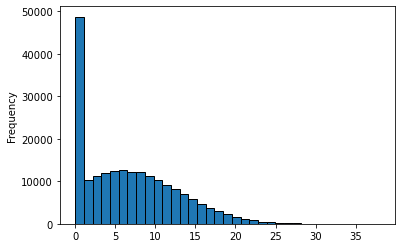

In [4]:
calls['duration'].plot(kind='hist', ec='black', bins=35)
plt.show()

Очень большой выброс по длительности в 1 минуту. Надо разобраться, что это и что с этим делать.

In [5]:
print('Количество строк меньше 1 -', len(calls[calls.duration < 1]))
print('Количество строк равное 1 - ', len(calls[calls.duration == 1]))

Количество строк меньше 1 - 47927
Количество строк равное 1 -  88


На первый взгляд с данными в `calls` все нормально. Единственное надо привести дату к типу `to_datetime`. 
23% звонков имеют продолжительность меньше 1 минуты. 88 звонков равных 1 минуте(округленные данные)

### <a name="1.2."></a> 1.2. Информация об интернет-сессиях
<font>[к Оглавлению](#0.0)</font>

In [6]:
display(internet.head(), internet.info(), internet.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


None

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


На первый взгляд с данными в `internet` все нормально. Единственное надо привести дату к типу `to_datetime`

"Мегеалайн" всегда округляет минуты и мегабайты, поэтому тоже глянем на распределение гистограмы

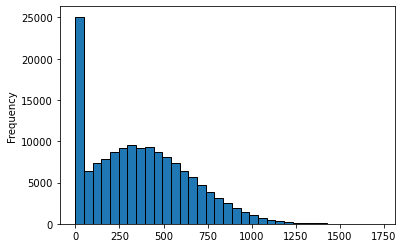

In [7]:
internet['mb_used'].plot(kind='hist', ec='black', bins=35)
plt.show()

Так же видим большой выброс около нуля. В процессе нужно решить, что с данными делать. 

In [8]:
print('Количество строк меньше 1 -', len(internet[internet.mb_used < 1]))
print('Количество строк равное 1 - ', len(internet[internet.mb_used == 1]))

Количество строк меньше 1 - 19699
Количество строк равное 1 -  1


Строки в которых значения меньше 1 похожи на срыв связи. Возможно, такие строки надо удалить, они не несут полезной информации.

### <a name="1.3."></a> 1.3. Информация о сообщениях
<font>[к Оглавлению](#0.0)</font>

In [9]:
display(messages.head(), messages.info(), messages.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


None

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


Данные без пропусков, нужно заменить тип даных столбца `message_date` на `datatime`

### <a name="1.4."></a> 1.4. Информация  тарифах
<font>[к Оглавлению](#0.0)</font>

In [11]:
display(tariffs.head(), tariffs.info(), tariffs.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


Поменяем название столбца тариф, для дальнейшего объединения с полной таблицей

In [12]:
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})

### <a name="1.5."></a> 1.5. Информация о пользователях
<font>[к Оглавлению](#0.0)</font>

In [13]:
display(users.head(), users.info(), users.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


None

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Надо привести `reg_date` и `churn_date` к типу `to_datetime`

Пропуски только в столбце `churn_date`, их много. Смотрим описание задачи - 
`churn_date` - дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных).

Оставим данные в этом столбце как есть - для решения поставленной задачи они нам не нужны, удалим его.

In [14]:
users.describe(include=['object'])

,churn_date,city,first_name,last_name,reg_date,tariff
count,38,500,500,500,500,500
unique,33,76,246,419,270,2
top,2018-12-21,Москва,Радим,Андреенко,2018-05-28,smart
freq,2,99,6,5,8,351


In [15]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Нам доступны данные 500 пользователей, 462 из которых все еще пользуются тарифом:
* 351 – Смарт
* 149 – Ультра

### Вывод:

В данных мало шума, выбросов и пропущенных данных. Надо заняться изменением даты, добавить столбец месяц, он нужен для анализа, привести к общему значению Мб и Гб, если это потребуется. Разобраться с 0 выбросами по звонкам и интернету.

## <a name="2."></a> Шаг 2. Предобработка данных
<font>[к Оглавлению](#0.0)</font>

### <a name="2.1."></a> 2.1. Изменение типа данных
<font>[к Оглавлению](#0.0)</font>

Удалим столбец `churn_date` что бы не мешал своими пропусками в дальнейших расчетах

In [16]:
del users['churn_date']

По каждой из таблиц (users, calls, messages, internet) есть столбцы, где необходимо изменить тип данных на `datetime`. Добавим столбец с месяцем в каждый датафрейм.

In [17]:
def date_to_month(dataframes):
    for df in dataframes:
        for column in df.columns:
            if 'date' in column:
                df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')
                df['month'] = df[column].apply(lambda x: x.month)
date_to_month([calls, messages, internet])

Проверим как все получилось.

In [18]:
for df in [calls, internet, messages, users]:
    display(df.info(), df.head())
    print('----------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


None

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
 5   month         149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.8+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   month         123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


None

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   city        500 non-null    object
 3   first_name  500 non-null    object
 4   last_name   500 non-null    object
 5   reg_date    500 non-null    object
 6   tariff      500 non-null    object
dtypes: int64(2), object(5)
memory usage: 27.5+ KB


None

,user_id,age,city,first_name,last_name,reg_date,tariff
0,1000,52,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


----------------------------------


Замена на `Datetime` прошла хорошо, столбцы с указанием месяца добавились.

### <a name="2.2."></a> 2.2. Выбросы
<font>[к Оглавлению](#0.0)</font>

Посмотрим, что за выбросы в `calls` и `internet`

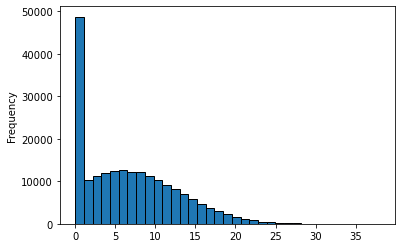

In [19]:
calls['duration'].plot(kind='hist', ec='black', bins=35)
plt.show()

In [20]:
print('Количество строк меньше 1 минуты  -', len(calls[calls.duration < 1]))
print('Количество строк равное 1 минуте - ', len(calls[calls.duration == 1]))
print('Количество строк равное 0 минут -', len(calls[calls.duration == 0]))

Количество строк меньше 1 минуты  - 47927
Количество строк равное 1 минуте -  88
Количество строк равное 0 минут - 39613


In [21]:
calls.query('duration < 1 and duration != 0').head()

,id,call_date,duration,user_id,month
55,1000_55,2018-09-19,0.31,1000,9
65,1000_65,2018-10-28,0.34,1000,10
97,1000_97,2018-10-26,0.33,1000,10
122,1000_122,2018-10-07,0.13,1000,10
135,1000_135,2018-10-25,0.02,1000,10


Есть 39613 строк равных нулю, это будем считать, что не дозвонился абонент. А 8314 строк больше 0 и меньше 1. По условию звонки менее минуты должны округляться до 1 минуты. Этого не произошло. Исправим и округлим до 1 минуты.

In [22]:
calls.loc[(calls['duration'] > 0) & (calls['duration'] < 1), 'duration'] = np.ceil(
    calls.loc[(calls['duration'] > 0) & (calls['duration'] < 1), 'duration'])

print('Количество строк меньше 1 минуты -', len(calls[calls.duration < 1]))
print('Количество строк равное 1 минуте - ', len(calls[calls.duration == 1]))
print('Количество строк равное 0 минут -', len(calls[calls.duration == 0]))

Количество строк меньше 1 минуты - 39613
Количество строк равное 1 минуте -  8402
Количество строк равное 0 минут - 39613


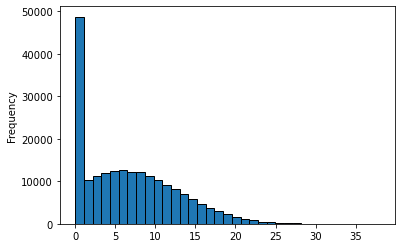

In [23]:
calls['duration'].plot(kind='hist', ec='black', bins=35)
plt.show()

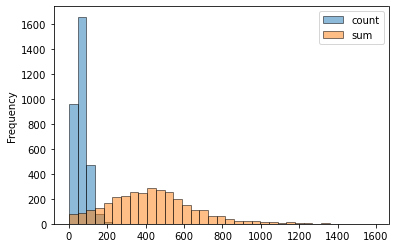

In [24]:
calls_month = calls.pivot_table(
    index=['month', 'user_id'],
    values='duration',
    aggfunc=['count', 'sum']
)
calls_month.columns = ['count', 'sum']

calls_month.plot(kind='hist', ec='black', alpha=0.5, bins=35)
plt.show()

Удалять звонки с 0 минут не будем, скорей всего в дальнейшем будет пересечение с интернетом, в котором есть данные, которые не хотелось бы терять.

Выполним условие оператора, все значения в датасете `internet`, которые меньше 1 минуты и не равно 0 округлим до 1 минуты.

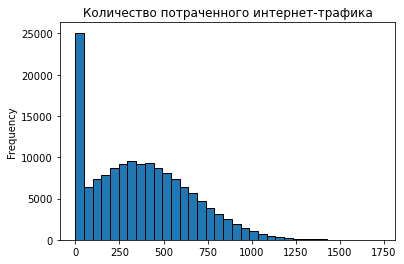

In [25]:
internet['mb_used'].plot(kind='hist', ec='black', bins=35)
plt.title('Количество потраченного интернет-трафика')
plt.show()

In [26]:
print('Количество строк меньше 1 минуты и не равное 0 -', len(internet.query('mb_used > 0 and mb_used < 1')))
print('Количество строк равное 1 минуте - ', len(internet.query('mb_used == 1')))

Количество строк меньше 1 минуты и не равное 0 - 101
Количество строк равное 1 минуте -  1


In [27]:
internet.query('mb_used > 0 and mb_used < 1').head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
1379,1379,1006_10,0.86,2018-12-19,1006,12
1593,1593,1006_224,0.93,2018-03-18,1006,3
5229,5229,1015_237,0.41,2018-06-21,1015,6
8886,8886,1031_31,0.33,2018-12-16,1031,12
9929,9929,1033_309,0.17,2018-11-26,1033,11


По условию звонки менее минуты должны округляться до 1 минуты. Этого не произошло. Исправим и округлим 101 строку до 1 минуты.

In [28]:
internet.loc[(internet['mb_used'] > 0) & (internet['mb_used'] < 1), 'mb_used'] = np.ceil(
    internet.loc[(internet['mb_used'] > 0) & (internet['mb_used'] < 1), 'mb_used'])

print('Количество строк меньше 1 минуты и не равное 0 -', len(internet.query('mb_used > 0 and mb_used < 1')))
print('Количество строк равное 1 минуте - ', len(internet.query('mb_used == 1')))

Количество строк меньше 1 минуты и не равное 0 - 0
Количество строк равное 1 минуте -  102


### <a name="2.3."></a> 2.3. Посчитаем кол-во звонков, смс, интернета для каждого пользователя помесячно
<font>[к Оглавлению](#0.0)</font>

Объединим таблицы в одну для удобства анализа

Сгруппируем таблицы по `user_id` и `month`. Поменяем название столбцов по количеству и сумме звонков. Объединим три таблицы в одну методом `merge`.

In [29]:
df_calls = calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum']).reset_index()
df_calls.columns = ['user_id', 'month', 'calls_count', 'minutes_sum']

df_internet = internet.groupby(['user_id', 'month'])['mb_used'].sum()
df_messages = messages.groupby(['user_id', 'month'])['id'].count()

df_full = df_calls.merge(df_messages, on=(['user_id', 'month']), how='outer')
df_full = df_full.merge(df_internet, on=(['user_id', 'month']), how='outer')
df_full.columns = ['user_id', 'month', 'calls_count', 'minutes_sum', 'sms', 'internet_mb']
df_full.head(5)

,user_id,month,calls_count,minutes_sum,sms,internet_mb
0,1000,5,22.0,150.73,22.0,2253.49
1,1000,6,43.0,159.56,60.0,23233.77
2,1000,7,47.0,320.36,75.0,14003.64
3,1000,8,52.0,390.08,81.0,14055.93
4,1000,9,58.0,441.38,57.0,14568.91


Добавим в таблицу данные абонентов. Нас интересует город и название тарифа.

In [30]:
df_full = df_full.merge(users, on='user_id', how='left')
df_full.head(10)

,user_id,month,calls_count,minutes_sum,sms,internet_mb,age,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,150.73,22.0,2253.49,52,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,159.56,60.0,23233.77,52,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,320.36,75.0,14003.64,52,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,390.08,81.0,14055.93,52,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,441.38,57.0,14568.91,52,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
5,1000,10,57.0,331.63,73.0,14702.49,52,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
6,1000,11,43.0,319.04,58.0,14756.47,52,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
7,1000,12,46.0,313.89,70.0,9817.61,52,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
8,1001,11,59.0,408.55,NaN,18429.34,41,Москва,Иван,Ежов,2018-11-01,smart
9,1001,12,63.0,393.64,NaN,14036.66,41,Москва,Иван,Ежов,2018-11-01,smart


In [31]:
df_full = df_full[['tariff', 'city', 'user_id', 'month', 'calls_count', 'minutes_sum', 'sms', 'internet_mb']]
df_full = df_full.merge(tariffs, on='tariff', how='left')
df_full.head()

,tariff,city,user_id,month,calls_count,minutes_sum,sms,internet_mb,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,ultra,Краснодар,1000,5,22.0,150.73,22.0,2253.49,1000,30720,3000,1950,150,1,1
1,ultra,Краснодар,1000,6,43.0,159.56,60.0,23233.77,1000,30720,3000,1950,150,1,1
2,ultra,Краснодар,1000,7,47.0,320.36,75.0,14003.64,1000,30720,3000,1950,150,1,1
3,ultra,Краснодар,1000,8,52.0,390.08,81.0,14055.93,1000,30720,3000,1950,150,1,1
4,ultra,Краснодар,1000,9,58.0,441.38,57.0,14568.91,1000,30720,3000,1950,150,1,1


Есть пропуски по многим позициям. Нас интересуют количество звонков, смс, мб интернета.

Проверим нашу теорию о звонках в 0 минут и посмотрим есть ли данные в соседних ячейках, которые могут нам быть важны.

In [32]:
df_full[(df_full['calls_count'].isnull())]

,tariff,city,user_id,month,calls_count,minutes_sum,sms,internet_mb,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
3174,ultra,Набережные Челны,1091,5,NaN,NaN,30.0,10703.37,1000,30720,3000,1950,150,1,1
3175,ultra,Набережные Челны,1091,6,NaN,NaN,30.0,10236.19,1000,30720,3000,1950,150,1,1
3176,ultra,Набережные Челны,1091,7,NaN,NaN,35.0,16444.98,1000,30720,3000,1950,150,1,1
3177,ultra,Набережные Челны,1091,8,NaN,NaN,31.0,12633.88,1000,30720,3000,1950,150,1,1
3178,ultra,Набережные Челны,1091,9,NaN,NaN,32.0,16597.11,1000,30720,3000,1950,150,1,1
3179,ultra,Набережные Челны,1091,10,NaN,NaN,44.0,15644.73,1000,30720,3000,1950,150,1,1
3180,ultra,Набережные Челны,1091,11,NaN,NaN,28.0,11864.25,1000,30720,3000,1950,150,1,1
3181,ultra,Набережные Челны,1091,12,NaN,NaN,42.0,13280.45,1000,30720,3000,1950,150,1,1
3182,ultra,Калуга,1106,4,NaN,NaN,9.0,2923.49,1000,30720,3000,1950,150,1,1
3183,ultra,Калуга,1106,5,NaN,NaN,28.0,16573.01,1000,30720,3000,1950,150,1,1


Видно ,что если пользователь не звонил, то писал большое количество SMS и пользовался интернетом. Выбор не удалять, правильный.

Проверим есть ли пропуски сразу по трем столбцам.

In [33]:
df_full[(df_full['calls_count'].isnull()) & (df_full['sms'].isnull()) &(df_full['internet_mb'].isnull())]

,tariff,city,user_id,month,calls_count,minutes_sum,sms,internet_mb,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute


Пропусков сразу по трем столбцам нет, значит абоненты активные и в разные период времени они пользуются чем то одним, двумя.

Заменим пропуски в смс, звонках и интернете на 0. В этом месяце абонент не пользовался данной у слугой,  следовательно 0.

In [34]:
df_full = df_full.fillna(0)

Поменяем тип у некоторых столбцов с `float` на `int64`

In [35]:
for column in ['calls_count', 'sms', 'internet_mb']:
    df_full[column] = df_full[column].astype('int')

In [36]:
df_full.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tariff                 3214 non-null   object 
 1   city                   3214 non-null   object 
 2   user_id                3214 non-null   int64  
 3   month                  3214 non-null   int64  
 4   calls_count            3214 non-null   int32  
 5   minutes_sum            3214 non-null   float64
 6   sms                    3214 non-null   int32  
 7   internet_mb            3214 non-null   int32  
 8   messages_included      3214 non-null   int64  
 9   mb_per_month_included  3214 non-null   int64  
 10  minutes_included       3214 non-null   int64  
 11  rub_monthly_fee        3214 non-null   int64  
 12  rub_per_gb             3214 non-null   int64  
 13  rub_per_message        3214 non-null   int64  
 14  rub_per_minute         3214 non-null   int64  
dtypes: f

In [37]:
df_full.head()

,tariff,city,user_id,month,calls_count,minutes_sum,sms,internet_mb,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,ultra,Краснодар,1000,5,22,150.73,22,2253,1000,30720,3000,1950,150,1,1
1,ultra,Краснодар,1000,6,43,159.56,60,23233,1000,30720,3000,1950,150,1,1
2,ultra,Краснодар,1000,7,47,320.36,75,14003,1000,30720,3000,1950,150,1,1
3,ultra,Краснодар,1000,8,52,390.08,81,14055,1000,30720,3000,1950,150,1,1
4,ultra,Краснодар,1000,9,58,441.38,57,14568,1000,30720,3000,1950,150,1,1


Таблица собрана, все пропуски заполнены, тип файлов поменян, можно посчитать помесячную выручку с каждого пользователя.

### <a name="2.4."></a> 2.4. Расчитаем выручку с каждого пользователя помесячно
<font>[к Оглавлению](#0.0)</font>

Создадим функцию, которая проверяет превышен ли купленный пакет, если да, то к общему пакету прибавляем сумму потраченного сверху. Все это заносим в новый столбец `month_rub_users`

In [38]:
def month_rub_users(row):
    minut =  row['minutes_sum'] - row['minutes_included']
    sm = row['sms'] - row['messages_included']
    mbs = row['internet_mb'] - row['mb_per_month_included']
    if minut >= 0:
        minutes = minut * row['rub_per_minute']
    else:
        minutes = 0
    
    if sm >= 0:
        sms = sm * row['rub_per_message'] 
    else:
        sms = 0
    
    if mbs >= 0:
        mb = mbs * (row['rub_per_gb']/1024)
    else:
        mb = 0
    return minutes + sms + mb + row['rub_monthly_fee']
     
df_full['month_rub_users'] = round(df_full.apply(month_rub_users, axis = 1))
df_full.head(10)

,tariff,city,user_id,month,calls_count,minutes_sum,sms,internet_mb,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month_rub_users
0,ultra,Краснодар,1000,5,22,150.73,22,2253,1000,30720,3000,1950,150,1,1,1950.0
1,ultra,Краснодар,1000,6,43,159.56,60,23233,1000,30720,3000,1950,150,1,1,1950.0
2,ultra,Краснодар,1000,7,47,320.36,75,14003,1000,30720,3000,1950,150,1,1,1950.0
3,ultra,Краснодар,1000,8,52,390.08,81,14055,1000,30720,3000,1950,150,1,1,1950.0
4,ultra,Краснодар,1000,9,58,441.38,57,14568,1000,30720,3000,1950,150,1,1,1950.0
5,ultra,Краснодар,1000,10,57,331.63,73,14702,1000,30720,3000,1950,150,1,1,1950.0
6,ultra,Краснодар,1000,11,43,319.04,58,14756,1000,30720,3000,1950,150,1,1,1950.0
7,ultra,Краснодар,1000,12,46,313.89,70,9817,1000,30720,3000,1950,150,1,1,1950.0
8,smart,Москва,1001,11,59,408.55,0,18429,50,15360,500,550,200,3,3,1149.0
9,smart,Москва,1001,12,63,393.64,0,14036,50,15360,500,550,200,3,3,550.0


Проверим какое количество месяцев было превышение тарифов.

In [39]:
print('Тариф Смарт Не превышен', len(df_full.query('tariff == "smart" and month_rub_users <= 550')), 'раз')
print('Тариф Смарт Превышен', len(df_full.query('tariff == "smart" and month_rub_users > 550')), 'раз')
print('Тариф Ультра Не превышен', len(df_full.query('tariff == "ultra" and month_rub_users <= 1950')), 'раз')
print('Тариф Ультра Превышен', len(df_full.query('tariff == "ultra" and month_rub_users > 1950')), 'раза')

Тариф Смарт Не превышен 598 раз
Тариф Смарт Превышен 1631 раз
Тариф Ультра Не превышен 851 раз
Тариф Ультра Превышен 134 раза


В тарифе Смарт превышен тариф в 3 раза, а в тарифе Ультра в 0,6 раз.

Таблица сумарного количества минут разговора, отправленных смс и объема интернет-трафика по тарифам.

In [40]:
(df_full.groupby('tariff').sum()[['minutes_sum', 'sms', 'internet_mb']]).reset_index()

,tariff,minutes_sum,sms,internet_mb
0,smart,881850.65,74413,36127405
1,ultra,491062.51,48623,19176308


## <a name="3."></a> Шаг 3. Анализ данных
<font>[к Оглавлению](#0.0)</font>

### <a name="3.1."></a> 3.1. Расходы пользователей в месяц
<font>[к Оглавлению](#0.0)</font>

Сколько минут раговора, смс сообщений и какой объем интернет-трафика требуется пользователям каждого тарифа в месяц.

Соберем данные в одну общую табличку, выстроив по месяцам. После разделим ее на две - smart и ultra.

In [41]:
df_full_month = df_full.pivot_table(index=['tariff', 'month'], values=['minutes_sum', 'sms', 'internet_mb'])
month_smart = df_full_month.loc['smart'].reset_index()
month_smart

,month,internet_mb,minutes_sum,sms
0,1,8513.176471,193.511176,18.235294
1,2,11596.517241,283.654483,24.086207
2,3,15103.740260,369.002208,31.857143
3,4,13461.669643,347.224911,30.741071
4,5,15804.680851,366.476312,33.773050
5,6,15794.164634,374.401280,33.402439
6,7,15742.646766,386.721642,33.751244
7,8,16610.234043,399.120511,33.638298
8,9,16303.126923,405.671038,33.638462
9,10,16756.608844,403.496463,33.765306


In [42]:
month_ultra = df_full_month.loc['ultra'].reset_index()
month_ultra

,month,internet_mb,minutes_sum,sms
0,1,13140.333333,405.620000,33.777778
1,2,11775.458333,281.507500,21.958333
2,3,17535.081081,463.597838,32.297297
3,4,16827.654545,433.281455,31.563636
4,5,19362.716418,483.138209,37.850746
5,6,18924.428571,454.201310,41.726190
6,7,20495.186813,516.716154,49.846154
7,8,19575.588785,483.291121,48.439252
8,9,19203.800000,510.520696,52.286957
9,10,20044.886179,528.422358,58.430894


Построим график, в котором сравним среднее количество минут разговора по месяцам, для двух тарифов.

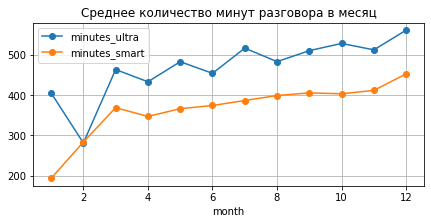

In [43]:
ax = month_ultra.plot( x='month', y='minutes_sum',style='o-', figsize=(7, 3), grid=True, label='minutes_ultra')   
month_smart.plot( x='month', y='minutes_sum',style='o-', figsize=(7, 3), grid=True, label='minutes_smart', ax=ax)
plt.title('Среднее количество минут разговора в месяц')
plt.show()

Построим график, в котором сравним количество отправленных sms по месяцам, для двух тарифов.

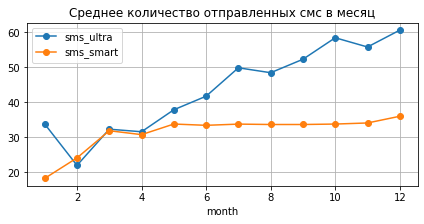

In [44]:
ax = month_ultra.plot( x='month', y='sms',style='o-', figsize=(7, 3), grid=True, label='sms_ultra')   
month_smart.plot( x='month', y='sms',style='o-', figsize=(7, 3), grid=True, label='sms_smart', ax=ax)
plt.title('Среднее количество отправленных смс в месяц')
plt.show()

Построим график, в котором сравним объем интернет-трафика по месяцам, для двух тарифов.

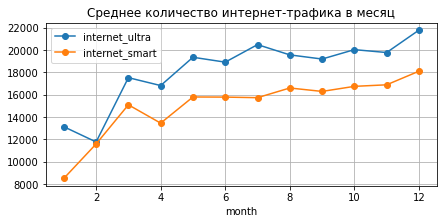

In [45]:
ax = month_ultra.plot( x='month', y='internet_mb',style='o-', figsize=(7, 3), grid=True, label='internet_ultra')   
month_smart.plot( x='month', y='internet_mb',style='o-', figsize=(7, 3), grid=True, label='internet_smart', ax=ax)
plt.title('Среднее количество интернет-трафика в месяц')
plt.show()

По всем графикам видно, что в тарифе Ультра потребление услуг больше чем в тарифе Смарт. Во втором месяце было падение в потреблении услуг в тарифе Ультра, а потом все пошло вышло на прежний уровень.

Посмотрим на количество операций каждого абонента и его сумму, которую он оплатил за период пользования тарифом

In [46]:
smart_user = df_full.query('tariff == "smart"').pivot_table(
    index=['tariff', 'user_id'], values='month_rub_users', aggfunc=['count', 'sum']).astype('int')
ultra_user = df_full.query('tariff == "ultra"').pivot_table(
    index=['tariff', 'user_id'], values='month_rub_users', aggfunc=['count', 'sum']).astype('int')
display('Смарт', smart_user.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]).T, 
        'Ультра', ultra_user.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]).T)
       

'Смарт'

,,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,95%,max
count,month_rub_users,350.0,6.368571,3.397899,1.0,2.0,3.0,4.0,5.0,6.0,7.0,9.0,10.0,11.0,12.0,12.0
sum,month_rub_users,350.0,7636.300000,5029.227707,550.0,1706.2,3051.6,4461.0,5599.2,6712.0,8039.8,9582.3,11548.0,14389.3,17398.7,26692.0


'Ультра'

,,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,95%,max
count,month_rub_users,148.0,6.655405,3.261219,1.0,2.0,3.0,5.0,5.0,7.0,8.0,9.0,10.0,11.0,11.65,12.0
sum,month_rub_users,148.0,13709.229730,6807.228373,1950.0,3900.0,6205.8,9750.0,11700.0,13650.0,16037.6,17550.0,19500.0,22137.0,23507.25,31752.0


Интеренсное распределение максимальной стоимости в месяц по тарифам. В Смарте при абонплате в 550 рублей максимальный платеж 26700 рублей. Видимо кому то нужно было много интернета в течении всего года. Купив тариф Ультра этот абонент точно бы сэкономил 3000 рублей. У тарифе Ультра абонент максимально переплатил 8000 рублей, хотя 90% абонентов не выходят за рамки тарифа.

### <a name="3.2."></a> 3.2. Посчитаем среднее количество, дисперсию и стандарное отклонение
<font>[к Оглавлению](#0.0)</font>

Сделаем две таблички. В каждой будет только один из тарифов.

In [47]:
df_smart = df_full.query('tariff == "smart"')
df_smart.head()

,tariff,city,user_id,month,calls_count,minutes_sum,sms,internet_mb,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month_rub_users
8,smart,Москва,1001,11,59,408.55,0,18429,50,15360,500,550,200,3,3,1149.0
9,smart,Москва,1001,12,63,393.64,0,14036,50,15360,500,550,200,3,3,550.0
10,smart,Стерлитамак,1002,6,15,111.06,4,10856,50,15360,500,550,200,3,3,550.0
11,smart,Стерлитамак,1002,7,26,205.50,11,17580,50,15360,500,550,200,3,3,984.0
12,smart,Стерлитамак,1002,8,42,270.07,13,20319,50,15360,500,550,200,3,3,1519.0


In [48]:
df_ultra = df_full.query('tariff == "ultra"')
df_ultra.head();

#### Среднее количеcтво минут по тарифам

In [49]:
round(df_full.groupby('tariff')[['minutes_sum', 'sms', 'internet_mb']].mean().reset_index())

,tariff,minutes_sum,sms,internet_mb
0,smart,396.0,33.0,16208.0
1,ultra,499.0,49.0,19468.0


#### Дисперсия по тарифам

In [50]:
round(df_full.groupby('tariff')[['minutes_sum', 'sms', 'internet_mb']].var().reset_index())

,tariff,minutes_sum,sms,internet_mb
0,smart,32558.0,797.0,34462559.0
1,ultra,90467.0,2285.0,101751206.0


#### Стандартное отклонение по тарифам

In [51]:
round(df_full.groupby('tariff')[['minutes_sum', 'sms', 'internet_mb']].std().reset_index())

,tariff,minutes_sum,sms,internet_mb
0,smart,180.0,28.0,5870.0
1,ultra,301.0,48.0,10087.0


Идеальная табличка

|              |           | minutes  | sms    |internet|
|:-------------|-----------|----------|--------|----------|
| smart        | mean      |          |        |      |
|              |var        |          |        |     |
|              |std        |          |        |     |
| ultra        | mean      |          |        |      |
|              |var        |          |        |     |
|              |std        |          |        |     |

### <a name="3.3."></a> 3.3. Построим гистограммы
<font>[к Оглавлению](#0.0)</font>

Построим гистограммы по тарифам по длительности звонков, количеству отправленных смс, количеству потребленного интернет трафика.

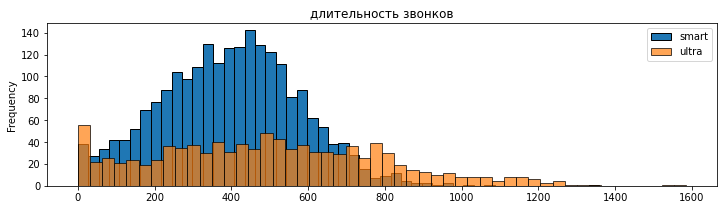

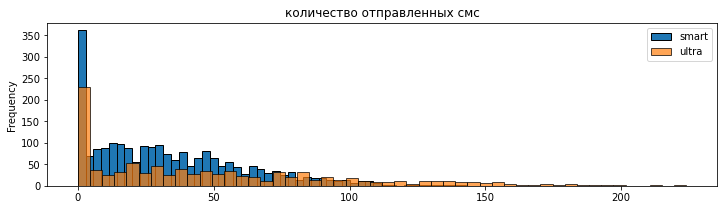

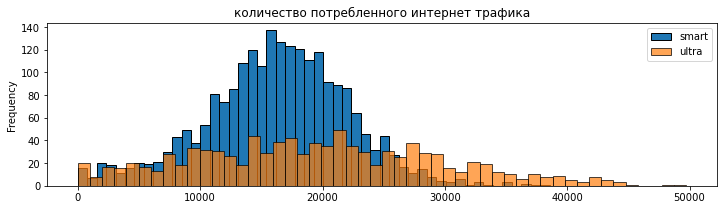

In [52]:
df_titles_list = ['длительность звонков', 'количество отправленных смс', 'количество потребленного интернет трафика']
count=0
for column in ['minutes_sum', 'sms', 'internet_mb']:
    ax = df_smart[column].plot(
        kind='hist', figsize=(12,4), bins=50, fontsize=10, ec='black', label='smart', title=df_titles_list[count]) 
    df_ultra[column].plot(
        kind='hist', figsize=(12,3), bins=50, fontsize=10, ec='black', ax=ax, alpha=0.7, label='ultra', title=df_titles_list[count])
    plt.legend(loc='upper right')
    count += 1
    plt.show()

In [53]:
if df_smart['minutes_sum'].median() < df_smart['minutes_sum'].mean():
    print('График длительность звонков, тариф Смарт с положительной скошенностью')
else:
    print('График длительность звонков, тариф Смарт с отрицательной скошенностью')

if df_ultra['minutes_sum'].median() < df_ultra['minutes_sum'].mean():
    print('График длительность звонков, тариф Ультра с положительной скошенностью')
else:
    print('График длительность звонков, тариф Ультра с отрицательной скошенностью')
print('----------------')
if df_smart['sms'].median() < df_smart['sms'].mean():
    print('График количество отправленных смс, тариф Смарт с положительной скошенностью')
else:
    print('График количество отправленных смс, тариф Смарт с отрицательной скошенностью')

if df_ultra['sms'].median() < df_ultra['sms'].mean():
    print('График количество отправленных смс, тариф Ультра с положительной скошенностью')
else:
    print('График количество отправленных смс, тариф Ультра с отрицательной скошенностью')
print('----------------')
if df_smart['internet_mb'].median() < df_smart['internet_mb'].mean():
    print('График количество потребленного интернет трафика, тариф Смарт с положительной скошенностью')
else:
    print('График количество потребленного интернет трафика, тариф Смарт с отрицательной скошенностью')

if df_ultra['internet_mb'].median() < df_ultra['internet_mb'].mean():
    print('График количество потребленного интернет трафика, тариф Ультра с положительной скошенностью')
else:
    print('График количество потребленного интернет трафика, тариф Ультра с отрицательной скошенностью')


График длительность звонков, тариф Смарт с отрицательной скошенностью
График длительность звонков, тариф Ультра с положительной скошенностью
----------------
График количество отправленных смс, тариф Смарт с положительной скошенностью
График количество отправленных смс, тариф Ультра с положительной скошенностью
----------------
График количество потребленного интернет трафика, тариф Смарт с отрицательной скошенностью
График количество потребленного интернет трафика, тариф Ультра с положительной скошенностью


Cреднее количество, дисперсии и стандарное отклонение в одной табличке.

In [54]:
df_calс = round(df_full.groupby('tariff')[['minutes_sum', 'sms', 'internet_mb']]
      .agg([np.mean, lambda x: np.std(x, ddof=1), lambda y: np.var(y, ddof=1)])).reset_index()
df_calс.columns = (['tariff', 'minute_mean', 'minute_std', 'minute_var', 
                    'sms_mean', 'sms_std', 'sms_var', 
                    'internet_mean', 'internet_std', 'internet_var'])
df_calс

,tariff,minute_mean,minute_std,minute_var,sms_mean,sms_std,sms_var,internet_mean,internet_std,internet_var
0,smart,396.0,180.0,32558.0,33.0,28.0,797.0,16208.0,5870.0,34462559.0
1,ultra,499.0,301.0,90467.0,49.0,48.0,2285.0,19468.0,10087.0,101751206.0


In [55]:
round(df_full.groupby('tariff')[['minutes_sum', 'sms', 'internet_mb']].agg(['mean', 'var', 'std']).stack())

minutes_sum     sms  internet_mb
tariff                                       
smart  mean        396.0    33.0      16208.0
       var       32558.0   797.0   34462559.0
       std         180.0    28.0       5870.0
ultra  mean        499.0    49.0      19468.0
       var       90467.0  2285.0  101751206.0
       std         301.0    48.0      10087.0

### <a name="3.4."></a> 3.4. Описание распределений
<font>[к Оглавлению](#0.0)</font> 

В основном, на тарифе Смарт люди разговаривают в месяц в течение 300-600 минут. Среднее значение равно 396 минут, когда лимит общения по тарифу за абонентскую плату - 500 минут, т.е. пользователи регулярно выбирают почти полный лимит голосовой связи. 

С тарифом Ультра немного иная ситуация - большая часть пользователей вообще не разговаривает голосом. На графике иден всплеск в самом начале. Из тех, кто разговаривает, в среднем наговаривают 498 минут, при тарифе в 3000 минут.

По итогу, среднее тарифа Ультра больше, чем среднее Смарт.

На тарифе Смарт люди отправляют смс в месяц в количестве 25-35 шт. Среднее значение равно 33 шт., когда лимит смс по тарифу за абонентскую плату - 50 сообщений, т.е. пользователи редко выбирают полный лимит смс. очень большое количество людей которые отправляют до 5 смс в месяц, что увеличивает среднее по тарифу. 

Тариф Ультра немного выше по среднему за смс 49шт., при лимите в 1000 сообщений. Людям не важны смс сообщения, об этом так же говорит количество людей, которые отправляют до 5смс в месяц.

На тарифе Смарт интернет-трафик потребляют в среднем 16Гб, при тарифе в 15Гб. Люди очень много докупают интернет-трафика.

В Тарифе ультра при 30Гб в потребляют немногим больше 19Гб. Явно есть люди которые укладываются в рамки тарифа и немногие кто докупают дополнительный интернет-трафик.

## <a name="4."></a> Шаг 4. Проверка гипотез
<font>[к Оглавлению](#0.0)</font>

### <a name="4.1."></a> 4.1. Различие средней выручки по тарифам
<font>[к Оглавлению](#0.0)</font>

In [56]:
print('Средняя выручка пользователей тарифа Смарт', round(df_smart['month_rub_users'].mean()), 'руб.')
print('Средняя выручка пользователей тарифа Ультра', round(df_ultra['month_rub_users'].mean()), 'руб.')
df_smart['month_rub_users']

Средняя выручка пользователей тарифа Смарт 1199 руб.
Средняя выручка пользователей тарифа Ультра 2060 руб.


8       1149.0
9        550.0
10       550.0
11       984.0
12      1519.0
         ...  
3208     550.0
3209     911.0
3210    1370.0
3211     966.0
3212     933.0
Name: month_rub_users, Length: 2229, dtype: float64

H0 (нулевая гипотеза) - предположение о том, что между данными у нас нет связи. В данном случае, что средняя выручка пользователей тарифа Смарт не отличается от средней выручки пользователей тарифа Ультра.

H1 (альтернативная гипотеза) - средняя выручка пользователей тарифа Смарт отличается от средней выручки пользователей тарифа Ультра.

In [57]:
from scipy import stats as st
alpha = 0.05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    df_smart['month_rub_users'], 
    df_ultra['month_rub_users'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.867742675895474e-212
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что средняя выручка пользователей тарифа Смарт отличается от средней выручки пользователей тарифа Ультра.

Пользователи тарифа Ультра в среднем приносят больше денег, т.к. их абонентская плата в 2 раза выше, чем абонентская плата пользователей с тарифом Смарт (1950р. против 550р.). Клиенты с тарифом Смарт довольно часто вылезают за пределы своего тарифа и заказывают дополнительные услуги, но всё равно не достигают трат пользователей с тарифом Ультра.

### <a name="4.2."></a> 4.2. Различие средней выручки пользователей из Москвы и других регионов
<font>[к Оглавлению](#0.0)</font>

In [58]:
print('Средняя выручка пользователей из Москвы', round(df_full.query('city == "Москва"')['month_rub_users'].mean()), 'руб.')
print('Средняя выручка пользователей из других регионов', round(df_full.query('city != "Москва"')['month_rub_users'].mean()), 'руб.')

Средняя выручка пользователей из Москвы 1486 руб.
Средняя выручка пользователей из других регионов 1457 руб.


H0 (нулевая гипотеза) - предположение о том, что между данными у нас нет связи. В данном случае, что средняя выручка пользователей из Москвы не отличается от средней выручки пользователей из других регионов.

H1 (альтернативная гипотеза) - средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов.

In [59]:
from scipy import stats as st
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    df_full.query('city == "Москва"')['month_rub_users'], 
    df_full.query('city != "Москва"')['month_rub_users'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.41307430798748335
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что в данном случае средняя выручка пользователей из Москвы не отличается от средней выручки пользователей из других регионов.

В Москве в среднем платят на 30р. больше, чем в регионах.

Формулировка нулевой гипотезы H₀. «Среднее рассматриваемой генеральной совокупности равно A», где А — некоторое число.

Исходя из H₀ формулируется альтернативная гипотеза H₁. Для этой H₀ она звучит как «среднее генеральной совокупности не равно A».

H₀ всегда формулируется так, чтобы использовать знак равенства. Другими словами, чтобы все значения, полученные эмпирически, не были экстремальными, а лежали там, где ожидаем их найти.

## <a name="5."></a> Шаг 5. Общий вывод
<font>[к Оглавлению](#0.0)</font>

In [60]:
print('Количество пользователей тарифа Смарт - ', len(smart_user), 'человек')
print('Количество пользователей тарифа Ультра - ', len(ultra_user), 'человек')

Количество пользователей тарифа Смарт -  350 человек
Количество пользователей тарифа Ультра -  148 человек


В таблице ниже видно, что тариф Смарт в среднем в два раза дешевле чем тариф Ультра, но по сумме выручки на 24% Смарт больше чем Ультра.

In [61]:
stat_grouped = df_full.pivot_table(index='tariff', values='month_rub_users', aggfunc=['mean', 'sum', 'count']).astype('int')
stat_grouped

,mean,sum,count
,month_rub_users,month_rub_users,month_rub_users
tariff,,,
smart,1199,2672705,2229
ultra,2059,2028966,985


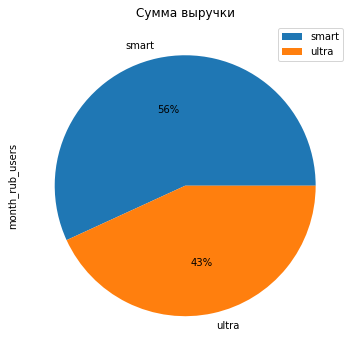

In [62]:
stat_grouped.plot(kind='pie', y='sum', figsize=(6, 6), autopct='%i%%', title = 'Сумма выручки')
plt.show()

Тариф Смарт приносит около 56% всей выручки, но при этом на него приходится 350 абонентов. Тариф Ультра дает остальные 43%, но эту выручку генерируют всего 148 человек.

In [63]:
df_full.query('tariff == "smart"')[['minutes_sum', 'sms', 'internet_mb','month_rub_users']].describe()

,minutes_sum,sms,internet_mb,month_rub_users
count,2229.000000,2229.000000,2229.000000,2229.000000
mean,395.626133,33.384029,16207.898161,1199.060117
std,180.439686,28.227876,5870.482000,768.409893
min,0.000000,0.000000,0.000000,550.000000
25%,268.250000,10.000000,12643.000000,550.000000
50%,398.850000,28.000000,16506.000000,926.000000
75%,517.230000,51.000000,20042.000000,1603.000000
max,1357.760000,143.000000,38552.000000,6554.000000


In [64]:
df_full.query('tariff == "ultra"')[['minutes_sum', 'sms', 'internet_mb','month_rub_users']].describe()

,minutes_sum,sms,internet_mb,month_rub_users
count,985.000000,985.000000,985.000000,985.000000
mean,498.540619,49.363452,19468.332995,2059.863959
std,300.776681,47.804457,10087.180277,354.865668
min,0.000000,0.000000,0.000000,1950.000000
25%,268.580000,6.000000,11770.000000,1950.000000
50%,489.160000,38.000000,19308.000000,1950.000000
75%,713.360000,79.000000,26837.000000,1950.000000
max,1585.590000,224.000000,49745.000000,4737.000000


#### Количество и сумма звонков абонентов двух тарифов

In [65]:
group_calls = df_full.pivot_table(index='tariff', values='minutes_sum', aggfunc=['mean', 'sum', 'count']).astype('int')
group_calls

,mean,sum,count
,minutes_sum,minutes_sum,minutes_sum
tariff,,,
smart,395,881850,2229
ultra,498,491062,985


In [66]:
df_full.query('tariff == "smart" and minutes_sum > 500')['minutes_sum'].mean()

610.0860697305862

In [67]:
df_full.query('tariff == "ultra" and minutes_sum > 3000')['minutes_sum'].mean()

nan

Среднему пользователю тарифа Смарт хватает 500 минут разговора в месяц. 

Если рассматривать только тех пользователей Смарт, кто вылезает за лимиты по звонкам, то средний размер доп. заказа минут разговора равен 610 минутам, за которые они платят 1830 рублей.

По тарифу Ультра средний чек за доплату звонков нет вообще. Никто не смог выговорить все количество минут в этом тарифе.

#### Количество смс абонентами

In [68]:
group_sms = df_full.pivot_table(index='tariff', values='sms', aggfunc=['mean', 'sum', 'count']).astype('int')
group_sms

,mean,sum,count
,sms,sms,sms
tariff,,,
smart,33,74413,2229
ultra,49,48623,985


In [69]:
df_full.query('tariff == "smart" and sms > 50')['sms'].mean()

72.92198581560284

In [70]:
df_full.query('tariff == "smart" and sms > 1000')['sms'].mean()

nan

Среднему пользователю тарифа Смарт хватает 50 смс в месяц. 

Если рассматривать только тех пользователей Смарт, кто вылезает за лимиты по смс, то средний размер доп. заказа смс равен 72 смс, за которые они платят 216 рублей.

По тарифу Ультра средний чек за доплату смс нет вообще. Никто не смог написать такое количество смс в этом тарифе.

#### Потребление интернета абонентами

In [71]:
group_internet = df_full.pivot_table(index='tariff', values='internet_mb', aggfunc=['mean', 'sum', 'count']).astype('int')
group_internet

,mean,sum,count
,internet_mb,internet_mb,internet_mb
tariff,,,
smart,16207,36127405,2229
ultra,19468,19176308,985


In [72]:
df_full.query('tariff == "smart" and internet_mb > 15000')['internet_mb'].mean()

19915.146993318485

In [73]:
df_full.query('tariff == "ultra" and internet_mb > 30000')['internet_mb'].mean()

35685.91891891892

Среднему пользователю тарифа Смарт не хватает 1,2 Гб интернета к заложенными в абонентскую плату 15 Гб и ему приходится дозаказывать эти 1,2 Гб и доплачивать за них 240 рублей.

Если рассматривать только тех пользователей Смарт, кто вылезает за лимиты по интернет-трафику, то средний размер доп. заказа интернет-трафика равен 5 Гб, за которые они платят 1000 рублей.

По тарифу Ультра средний чек за доплату интернета составляет 500 рублей.

В тарифной сетке есть дешевый тариф Смарт за 550 рублей, где пользователю не хватает интернета и количество использованных минут разговора на грани лимита (418 мин из 500), и есть тариф Ультра, стоимостью 1950 рублей, которым пользуется уже другой класс граждан, где лимитов по всем типам связи предостаточно (иногда дозаказывают в среднем 4 Гб интернета).


Исследование показывает, что такие виды связи как смс и разговоры по телефону, уступают место интернет-трафику. Людям в большей степени важно наличие большого количества интернета по доступной цене. Возможно надо рассмтреть новый тариф, который лучше удовлетворит потребности абонентов. 

Отвечая на вопрос "какой тариф лучше" исходя из вышеприведенного анализа, можем сказать:

для оператора – тариф Ультра выгодней  
для пользователя – тарифа Смарт дешевле